<a href="https://colab.research.google.com/github/iksnn/Learn-Basic-Deep-Learning/blob/main/Sentiment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data source : https://www.kaggle.com/datasets/anggapurnama/twitter-dataset-ppkm?select=INA_TweetsPPKM_Labeled_Pure.csv  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
folder_path = "/content/drive/MyDrive/MSIB Celerates Batch 7/Code Ipynb/42. Sentiment Analysis/"

In [ ]:
df = pd.read_csv(folder_path + "cleaned_data.csv")
print(df.shape)
df.head()

(21399, 2)


,Tweet,sentiment
0,tahu informasi bagi ppkm wilayah jabar dasar l...,1
1,ibadah wilayah ppkm level 1 kapasitas 100 pers...,1
2,juru bicara satu tugas covid 19 wiku adisasmit...,1
3,tahu informasi bagi ppkm wilayah jabar dasar l...,1
4,menteri agama terbit surat edar nomor 06 2022 ...,1


In [ ]:
#memunculkan proporsi label
df["sentiment"].value_counts()

,count
sentiment,
1,15639
2,3869
0,1891


In [ ]:
#cek missing value
df.isnull().sum()

,0
Tweet,0
sentiment,0


In [ ]:
#undersampling
min_class_size = df["sentiment"].value_counts().min()
df_s1 = df[df.sentiment==1].sample(n=min_class_size, random_state=42)
df_s2 = df[df.sentiment==2].sample(n=min_class_size, random_state=42)
df_s3 = df[df.sentiment==0]
#gabungkan semua kelas
df = pd.concat([df_s1, df_s2, df_s3])
print(df.shape)
df.head()

(5673, 2)


,Tweet,sentiment
6421,swab on the road sotr anjung losari kota makas...,1
12438,croplife indonesia donasi 150 tabung oksigen p...,1
20504,ppkm psbb covid19indonesia menkoperekonomian,1
17180,ppkm singkat mnurutmu unik just fine ppkm ppkm...,1
21306,7 seru mccc sambut ppkm jawa bal mccc paham du...,1


In [ ]:
#split X dan y
X = df['Tweet']
y = df['sentiment']

In [ ]:
#split train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Word Count

In [ ]:
from collections import Counter

# Assuming X_train is a pandas Series or list of strings
def count_unique_words(X_train):
  """Counts the total number of unique words in X_train."""
  all_words = []
  for text in X_train:
    words = text.lower().split()
    all_words.extend(words)
  word_counts = Counter(all_words)
  return len(word_counts)


unique_word_count = count_unique_words(X_train)
print("Total unique words in X_train:", unique_word_count)

Total unique words in X_train: 12920


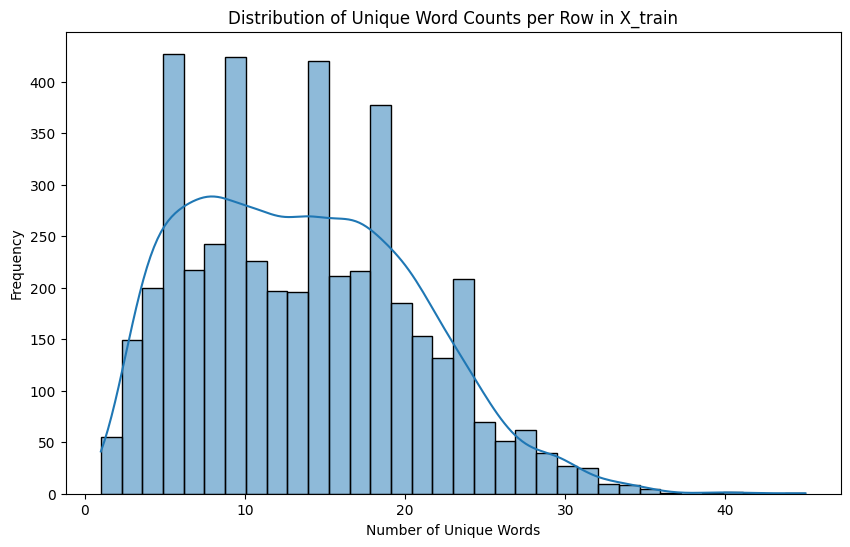

In [ ]:
# Assuming X_train is a pandas Series
unique_word_counts = X_train.apply(lambda x: len(set(x.split())))

# Create a distribution plot using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(unique_word_counts, kde=True)
plt.title('Distribution of Unique Word Counts per Row in X_train')
plt.xlabel('Number of Unique Words')
plt.ylabel('Frequency')
plt.show()

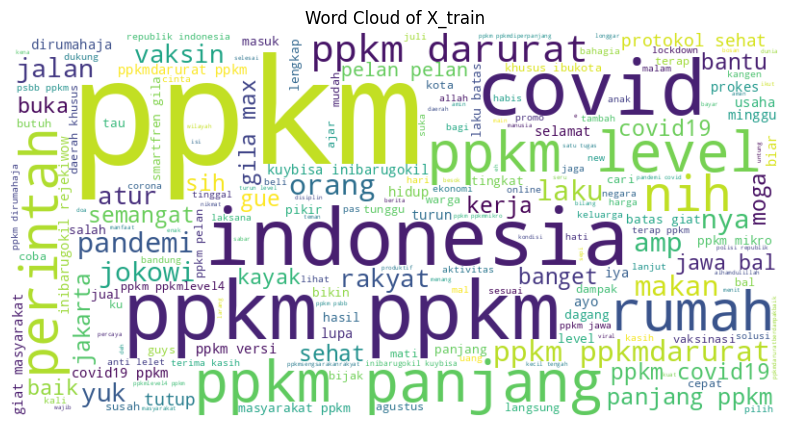

In [ ]:
from wordcloud import WordCloud

# Assuming X_train is a pandas Series
all_text = ' '.join(X_train)

# Generate the word cloud
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='white').generate(all_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of X_train')
plt.show()

# Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1,3),
    max_features=50000
)
vectorizer.fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
print(X_train_vectorized)

  (0, 3590)	0.12497129008768373
  (0, 3595)	0.13075414011274783
  (0, 3602)	0.21010141361228377
  (0, 4385)	0.12126764588921295
  (0, 4389)	0.15460914988019164
  (0, 4392)	0.21512271528809984
  (0, 6021)	0.12163486346938675
  (0, 6034)	0.21010141361228377
  (0, 7146)	0.12999259176349978
  (0, 7213)	0.21010141361228377
  (0, 7216)	0.24035819631623787
  (0, 12871)	0.11090268730822891
  (0, 13215)	0.24035819631623787
  (0, 13216)	0.24035819631623787
  (0, 16342)	0.11612501842032072
  (0, 16512)	0.16153057805398569
  (0, 16513)	0.16399857849515428
  (0, 23355)	0.0550818209773269
  (0, 24767)	0.24035819631623787
  (0, 24768)	0.24035819631623787
  (0, 27534)	0.13808304043393357
  (0, 27538)	0.16487296655356773
  (0, 36624)	0.1391095285818318
  (0, 36625)	0.1409102293021918
  (0, 36628)	0.14166482199778788
  :	:
  (4536, 20997)	0.11466355871499753
  (4536, 21007)	0.1545246167139798
  (4536, 21008)	0.1545246167139798
  (4536, 23355)	0.017705860263718582
  (4536, 25568)	0.1278936325008415
  (45

# Modeling and Evaluation

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train_vectorized, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.5418502202643172
              precision    recall  f1-score   support

           0       0.58      0.46      0.51       373
           1       0.55      0.59      0.57       404
           2       0.50      0.57      0.53       358

    accuracy                           0.54      1135
   macro avg       0.54      0.54      0.54      1135
weighted avg       0.55      0.54      0.54      1135



In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train_vectorized, y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7348017621145374
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       373
           1       0.82      0.72      0.76       404
           2       0.68      0.77      0.72       358

    accuracy                           0.73      1135
   macro avg       0.74      0.74      0.73      1135
weighted avg       0.74      0.73      0.74      1135

